In [ ]:
%matplotlib widget

In [1]:
import sys
sys.path.append('../..')
from lcs import SRC_ROOT
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import copy
from lcs.configs import Config
from run_script import get_data
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from lcs import TEXTWIDTH, PAGEHEIGHT
from lcs.plotting_utils import *

In [41]:
shared_cfg = Config(input_size=20,
       output_size=10,
       num_seeds=10, #1,
       num_contexts=2,
       num_paths=2,
       batch_size=200,
       initialization_scale=0.01,
       regularization_strength=0.3, 
       num_layers=1,
       hidden_size=10,
       context_model=True,
       name='',
       regularization_type=[('nonnegative', 1),
                            ('gating_manifold_L1', 5)],
       shared_teachers=False,
       shared_concat_teachers=False,
       c_gt_curriculum='A_B__',
       Y_tgt=None,
       W_teachers='generate',
       use_X=True,
       metric='cosine',
       teacher_mode='orthogonal',
       num_blocks=7,
       t_tot=7,
       T_tot=1000,
       block_duration=1.0,
       W_lr=None,
       W1_lr=None,
       W2_lr=None,
       c_lr=None,
       W_tau=0.1,
       W1_tau=None,
       W2_tau=None,
       c_tau=0.03,
       dt=0.001,
       log_every=1,
       T_tape=1000,
       dt_tape=0.001,
       control='',
       data_out_dir='data_internal/NTA_search/block_ctau_search/',
       results_out_dir='results_internal/NTA_search/block_ctau_search/',
       num_shared_contexts=0,
       mixing_factor=0.5,
       W_regularization_strength=0.0,
       turn_off_regularization=False,
       log_aux=True,
        )

In [43]:
block_hpams = [1, 0.8, 0.6, 0.4, 0.1]
c_tau_hpams = [0.02, 0.04, 0.06, 0.08, 0.1]

In [44]:
mean_concat_cossim = np.zeros((len(block_hpams), len(c_tau_hpams)))
last_concat_cossim = np.zeros((len(block_hpams), len(c_tau_hpams)))

for i in range(len(block_hpams)):
    for j in range(len(c_tau_hpams)):
        cfg = copy.deepcopy(shared_cfg)
        cfg.c_tau = c_tau_hpams[j]
        cfg.block_duration = block_hpams[i]
        cfg.name = f'block_{cfg.block_duration}_ctau_{cfg.c_tau}'
        data_path = Path(cfg.data_out_dir) 
        tape, cfg = get_data(cfg)
        mean_concat_cossim[i,j] = np.mean(tape.concat_cossim)   
        last_concat_cossim[i,j] = np.mean(tape.concat_cossim[:,-1])

np.save(data_path / 'mean_concat_cossim.npy', mean_concat_cossim)
np.save(data_path / 'last_concat_cossim.npy', last_concat_cossim)
with open(data_path / 'cfg.json', 'w') as f:
    json.dump(shared_cfg.__dict__, f)

In [45]:
shared_cfg = Config(input_size=20,
       output_size=10,
       num_seeds=10, 
       num_contexts=2,
       num_paths=2,
       batch_size=200,
       initialization_scale=0.01,
       regularization_strength=0.3, 
       num_layers=1,
       hidden_size=10,
       context_model=True,
       name='',
       regularization_type=[('nonnegative', 1),
                            ('gating_manifold_L1', 5)],
       shared_teachers=False,
       shared_concat_teachers=False,
       c_gt_curriculum='A_B__',
       Y_tgt=None,
       W_teachers='generate',
       use_X=True,
       metric='cosine',
       teacher_mode='orthogonal',
       num_blocks=7,
       t_tot=7, 
       T_tot=1000,
       block_duration=1.0,
       W_lr=None,
       W1_lr=None,
       W2_lr=None,
       c_lr=None,
       W_tau=0.1,
       W1_tau=None,
       W2_tau=None,
       c_tau=0.005,
       dt=0.001,
       log_every=1,
       T_tape=1000,
       dt_tape=0.001,
       control='',
       data_out_dir='data_internal/NTA_search/block_reg_search/',
       results_out_dir='results_internal/NTA_search/block_reg_search/',
       num_shared_contexts=0,
       mixing_factor=0.5,
       W_regularization_strength=0.0,
       turn_off_regularization=False,
       log_aux=True,
        )

In [46]:
block_hpams = [1, 0.8, 0.6, 0.4, 0.1]
reg_hpams = [0, 0.05, 0.1, 0.15, 0.2] 

In [47]:
mean_concat_cossim = np.zeros((len(block_hpams), len(reg_hpams)))
last_concat_cossim = np.zeros((len(block_hpams), len(reg_hpams)))

for i in range(len(block_hpams)):
    for j in range(len(reg_hpams)):
        cfg = copy.deepcopy(shared_cfg)
        cfg.regularization_strength = reg_hpams[j]
        cfg.block_duration = block_hpams[i]
        cfg.name = f'block_{cfg.block_duration}_reg_{cfg.regularization_strength}'
        data_path = Path(cfg.data_out_dir) 
        tape, cfg = get_data(cfg)
        mean_concat_cossim[i,j] = np.mean(tape.concat_cossim)  
        last_concat_cossim[i,j] = np.mean(tape.concat_cossim[:,-1])

np.save(data_path / 'mean_concat_cossim.npy', mean_concat_cossim)
np.save(data_path / 'last_concat_cossim.npy', last_concat_cossim)
with open(data_path / 'cfg.json', 'w') as f:
    json.dump(shared_cfg.__dict__, f)

In [48]:
# for loading saved hyperparameter search data
data_path = Path('data_internal/NTA_search/block_ctau_search/')
block_ctau_mean_concat_cossim = np.load(data_path / 'mean_concat_cossim.npy')
block_ctau_last_concat_cossim = np.load(data_path / 'last_concat_cossim.npy')

data_path = Path('data_internal/NTA_search/block_reg_search/')
block_reg_mean_concat_cossim = np.load(data_path / 'mean_concat_cossim.npy')
block_reg_last_concat_cossim = np.load(data_path / 'last_concat_cossim.npy')

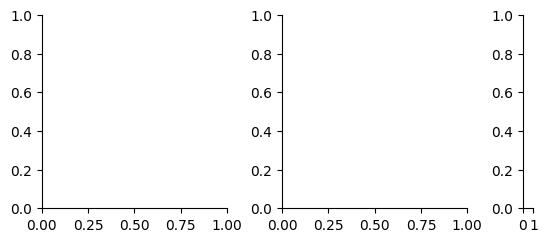

In [72]:
init_plot_settings()
s = 2
fig = plt.figure(figsize=(s*TEXTWIDTH*.65*.75, s*PAGEHEIGHT*0.14*.75), layout='constrained')

mosaic = """
abd
"""

axd = fig.subplot_mosaic(mosaic, width_ratios=[6,6,0.35])

for ax in axd.values():
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

ax_blocklength_clr = axd['a']
ax_blocklength_reg = axd['b']

In [73]:
print(block_ctau_last_concat_cossim)
print(block_reg_last_concat_cossim)

[[0.99975491 0.99437916 0.99275953 0.91705477 0.91932148]
 [0.99865735 0.99675608 0.98702192 0.91872042 0.7426151 ]
 [0.99879771 0.98455423 0.91972411 0.62472725 0.64230889]
 [0.99389976 0.59504527 0.63971609 0.66427726 0.68363488]
 [0.69539779 0.70235914 0.70554042 0.70606893 0.70601767]]
[[0.54631513 0.41560706 0.99994737 0.99995947 0.9999364 ]
 [0.50025046 0.69778872 0.99997872 0.99995184 0.99992877]
 [0.50378048 0.99998313 0.99998283 0.999955   0.99992877]
 [0.56913781 0.90791398 0.99661654 0.99511498 0.98763603]
 [0.66197592 0.68552613 0.62254137 0.63745099 0.6421265 ]]


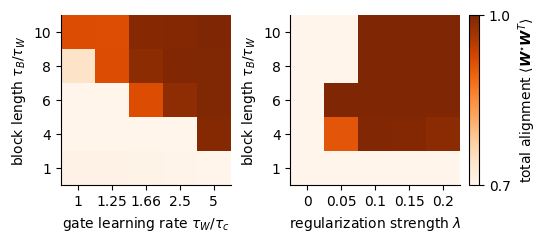

In [82]:
vmin = 0.7 
vmax = 1 

cmap = matplotlib.colormaps['Oranges']
normalizer = Normalize(vmin, vmax)
im = cm.ScalarMappable(cmap=cmap, norm=normalizer)

ax = ax_blocklength_clr
im1 = ax.imshow(np.fliplr(block_ctau_last_concat_cossim), cmap=cmap, vmin=vmin, vmax=vmax)
ax.set_xlabel(r'gate learning rate $\tau_W/\tau_c$')
ax.set_ylabel(r'block length $\tau_B/\tau_W$')
default_x_ticks = range(len(c_tau_hpams))
default_y_ticks = range(len(block_hpams))
ax.set_yticks(default_y_ticks, [10, 8, 6, 4, 1])
ax.set_xticks(default_x_ticks, [1, 1.25, 1.66, 2.5, 5])

ax = ax_blocklength_reg
im2 = ax.imshow(block_reg_last_concat_cossim, cmap=cmap, vmin=vmin, vmax=vmax) 
ax.set_xlabel(r'regularization strength $\lambda$')
ax.set_ylabel(r'block length $\tau_B/\tau_W$')
default_x_ticks = range(len(reg_hpams))
default_y_ticks = range(len(block_hpams))
ax.set_yticks(default_y_ticks, [10, 8, 6, 4, 1])
ax.set_xticks(default_x_ticks, reg_hpams)

fig.colorbar(im, cax=axd['d'], cmap=cmap, label='total alignment ' + r'$\langle \boldsymbol{W}^{\star} \boldsymbol{W}^{T}\rangle$', ticks=[0.7, 1]) 
fig

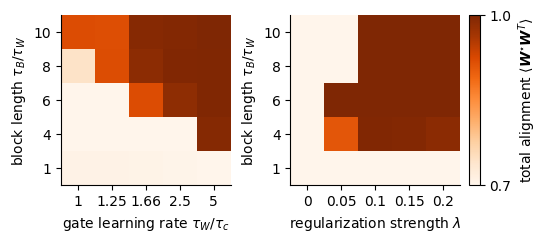

In [80]:
fig